## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
du_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = merged_df.loc[merged_df['Mouse ID'] != 'g989']     
clean_mice_df = pd.DataFrame(clean_mice_df)
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df['Mouse ID'].value_counts()

c264    10
x822    10
g497    10
f545    10
y478    10
        ..
t573     1
v199     1
d133     1
b447     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = clean_mice_df[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_vol.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_df['Std. Dev. Tumor Volume'] = tumor_vol.groupby(["Drug Regimen"]).std()
tumor_df['Median Tumor Volume'] = tumor_vol.groupby(["Drug Regimen"]).median()
tumor_df['Variance Tumor Volume'] = tumor_vol.groupby(["Drug Regimen"]).var()
tumor_df['SEM Tumor Volume'] = tumor_vol.groupby(["Drug Regimen"]).sem()
tumor_df

,Mean Tumor Volume,Std. Dev. Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar and Pie Charts

In [8]:
#Data for Bar PLot
#drug = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
#mice count: [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
mice_treatment_df = clean_mice_df.groupby(['Drug Regimen']).count()['Mouse ID']


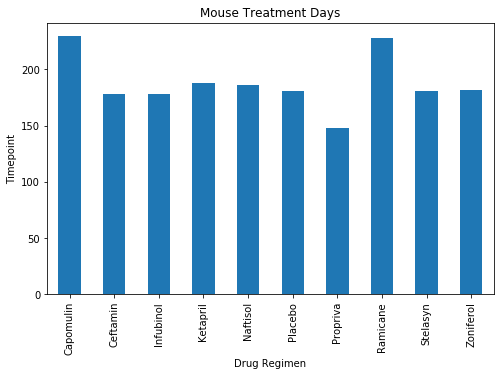

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mice_treatment_df.plot(kind="bar", figsize=(8,5))

plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.show()
plt.tight_layout()

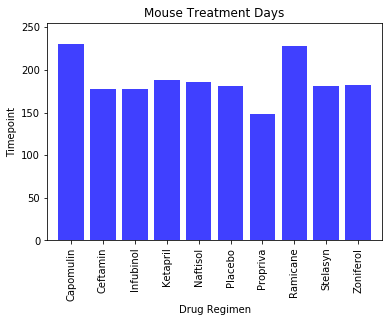

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
days = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

treatment = np.arange(len(mice_treatment_df))
tick_locations = []
for x in treatment:
    tick_locations.append(x)
    
plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.xlim(-0.75, len(treatment)-0.25)
plt.ylim(0, max(days) + 25)

plt.bar(treatment, days, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.show()

In [11]:
# DataFrame for Male vs Female for Pie Graphs
#calculate the total
#calculate the percents for male vs female
#Find the percent for the number of male vs female

gender_pie = clean_mice_df.groupby(['Sex', 'Mouse ID']).size()
gender_pie = pd.DataFrame(gender_pie.groupby(['Sex']).count())
gender_pie.columns = ['Total Gender']
gender_pie['Percent%'] = (100*(gender_pie['Total Gender']/gender_pie['Total Gender'].sum()))

gender_pie

,Total Gender,Percent%
Sex,,
Female,123,49.596774
Male,125,50.403226


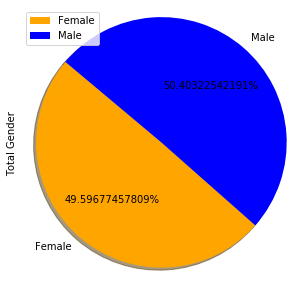

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female", "Male"]
colors = ["orange", "blue"]
explode = (5, 0)


plot = gender_pie.plot.pie(y='Total Gender', figsize=(5, 5), labels=labels, colors=colors,
        autopct="%1.11f%%", shadow=True, startangle=140)
plot.legend(loc="upper left")
plot.axis("equal")
plt.show()

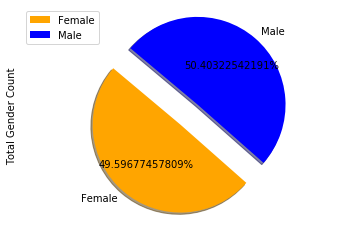

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
percent = [49.596774, 50.403226]
colors = ["orange", "blue"]
explode = (.3, 0)


plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.11f%%", shadow=True, startangle=140)
plt.legend(loc="best")
plt.ylabel("Total Gender Count")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Readme provided top 4 (Capomulin, Ramicane, Infubinol, and Ceftamin)
top_drugs = clean_mice_df[clean_mice_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_drugs = top_drugs.sort_values(["Timepoint"], ascending=True)
top_drugs_final = top_drugs[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
top_drugs_final = pd.DataFrame(top_drugs_final)
top_drugs_final.reset_index()

,index,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,0,Capomulin,b128,45.000000
1,221,Ceftamin,q483,45.000000
2,220,Ceftamin,o287,45.000000
3,219,Ceftamin,b487,45.000000
4,218,Ceftamin,p438,45.000000
...,...,...,...,...
809,1802,Infubinol,e476,62.435404
810,1804,Infubinol,a203,67.973419
811,1806,Infubinol,f345,60.918767
812,1810,Ceftamin,l471,67.748662


In [17]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#capomulin
Capomulin_quartiles = (top_drugs_final.loc[top_drugs_final["Drug Regimen"]== "Capomulin"]).quantile([.25,.5,.75]) 
Capo_lowerq = Capomulin_quartiles.loc[.25,"Tumor Volume (mm3)"]
Capo_upperq = Capomulin_quartiles.loc[.75,"Tumor Volume (mm3)"]
Capo_iqr =  Capo_upperq - Capo_lowerq
Capo_lowerbd = Capo_lowerq - (1.5*Capo_iqr)
Capo_upperbd = Capo_upperq + (1.5*Capo_iqr)

Capomulin_df = pd.DataFrame(Capomulin_quartiles)
Capomulin_df

#Ramicane
Ramicane_quartiles = (top_drugs_final.loc[top_drugs_final["Drug Regimen"]== "Ramicane"]).quantile([.25,.5,.75])
Rami_lowerq = Ramicane_quartiles.loc[.25,"Tumor Volume (mm3)"]
Rami_upperq = Ramicane_quartiles.loc[.75,"Tumor Volume (mm3)"]
Rami_iqr =  Rami_upperq - Rami_lowerq
Rami_lowerbd = Rami_lowerq - (1.5*Rami_iqr)
Rami_upperbd = Rami_upperq + (1.5*Rami_iqr)

Ramicane_df = pd.DataFrame(Ramicane_quartiles)
Ramicane_df

#Infubinol
Infubinol_quartiles = (top_drugs_final.loc[top_drugs_final["Drug Regimen"]== "Infubinol"]).quantile([.25,.5,.75])
Infub_lowerq = Infubinol_quartiles.loc[.25,"Tumor Volume (mm3)"]
Infub_upperq = Infubinol_quartiles.loc[.75,"Tumor Volume (mm3)"]
Infub_iqr =  Infub_upperq - Infub_lowerq
Infub_lowerbd = Infub_lowerq - (1.5*Infub_iqr)
Infub_upperbd = Infub_upperq + (1.5*Infub_iqr)

Infubinol_df = pd.DataFrame(Infubinol_quartiles)
Infubinol_df

#Ceftamin
Ceftamin_quartiles = (top_drugs_final.loc[top_drugs_final["Drug Regimen"]== "Ceftamin"]).quantile([.25,.5,.75])
Ceft_lowerq = Ceftamin_quartiles.loc[.25,"Tumor Volume (mm3)"]
Ceft_upperq = Ceftamin_quartiles.loc[.75,"Tumor Volume (mm3)"]
Ceft_iqr =  Ceft_upperq - Ceft_lowerq
Ceft_lowerbd = Ceft_lowerq - (1.5*Ceft_iqr)
Ceft_upperbd = Ceft_upperq + (1.5*Ceft_iqr)

Ceftamin_df = pd.DataFrame(Ceftamin_quartiles)
Ceftamin_df

,Tumor Volume (mm3)
0.25,47.208427
0.50,51.776157
0.75,56.801438


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

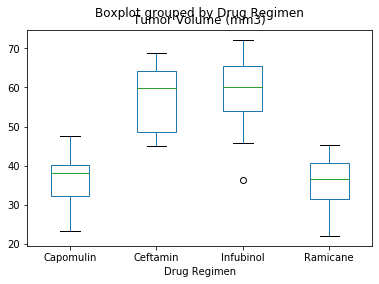

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
lasttmvol_top4_final = top_drugs_final.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']
lasttmvol_top4_final_df = pd.DataFrame(lasttmvol_top4_final)
lasttmvol_top4_final_df.reset_index()

# Create an ndarray with four columns and 20 rows
lasttmvol_top4_final_df.boxplot(by='Drug Regimen', column =['Tumor Volume (mm3)'], grid=False)
                                          
#plot.title("Mouse L509 Capomulin Treatment")
plot.xlabel("Drug Regimen")
plot.ylabel("Final Tumor Volume (mm3)")
plot.show()

## Line and Scatter Plots

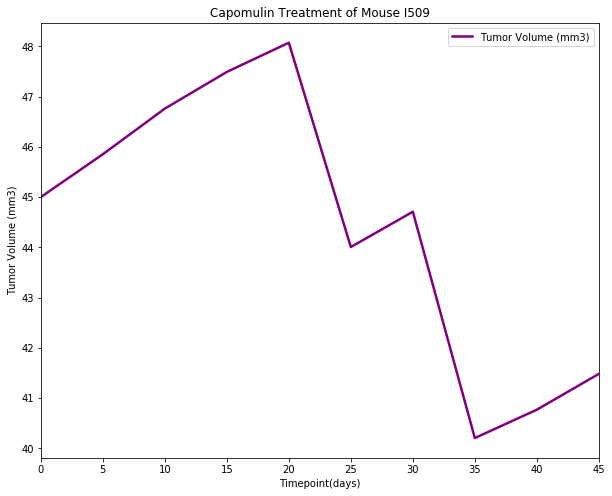

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_line_df = merged_df.loc[merged_df["Drug Regimen"] ==  "Capomulin"]
mouse_df = cap_line_df.loc[cap_line_df["Mouse ID"]== "l509"]
mouse_df = mouse_df[["Timepoint", "Tumor Volume (mm3)"]]
mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='purple')

#print lables and titles
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse I509')

# Prints the line plot to the screen
plt.show()


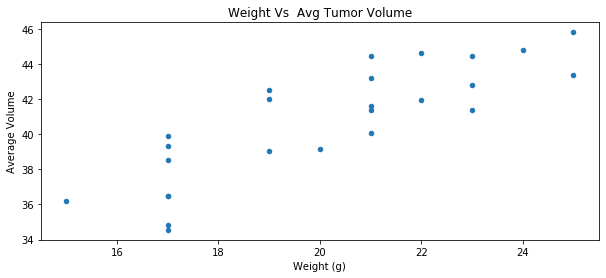

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#select multiple columns
cap_line_df= cap_line_df[["Weight (g)", "Tumor Volume (mm3)", "Mouse ID"]]
scatter_df  = pd.DataFrame(cap_line_df.groupby(["Mouse ID"]).mean())

#rename the column
scatter_df = scatter_df.rename(columns={"Tumor Volume (mm3)": "Average Volume"})

#create the plot
scatter_df.plot(kind="scatter", x="Weight (g)", y="Average Volume", figsize=(10,4),
             title="Weight Vs  Avg Tumor Volume")

# Prints the scatter plot to the screen
plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight =scatter_df.iloc[:,0]
average_tumor =scatter_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight,average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


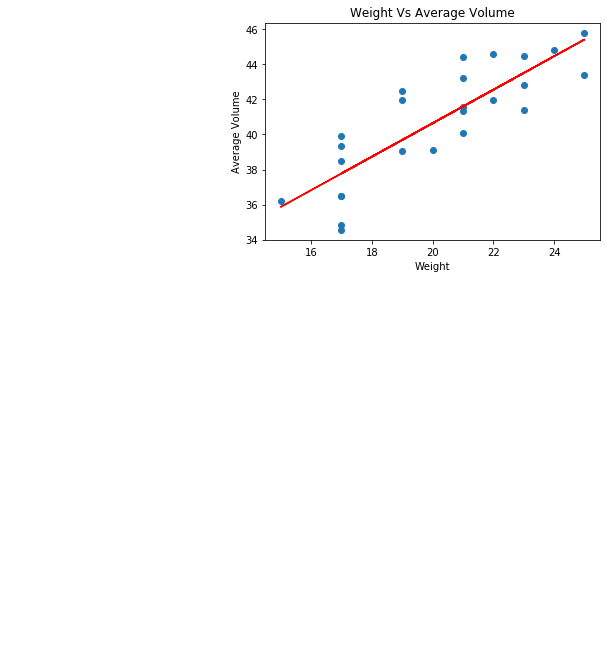

In [27]:
#Plot with Linear regression
x_values = scatter_df['Weight (g)']
y_values = scatter_df['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.title("Weight Vs Average Volume")
plt.xlabel('Weight')
plt.ylabel('Average Volume')

plt.show()